In [3]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../../scripts/")
import matplotlib.pyplot as plt
import numpy as np
import filenames
from hivevo.patients import Patient
import trajectory

from divergence import get_consensus_mask, get_non_consensus_mask

env 33% : [0.00956179]
env 50% : [0.02997333]
env 66% : [0.11997133]
pol 33% : [0.00696885]
pol 50% : [0.03195231]
pol 66% : [0.1199704]
gag 33% : [0.00797552]
gag 50% : [0.04498126]
gag 66% : [0.19995179]


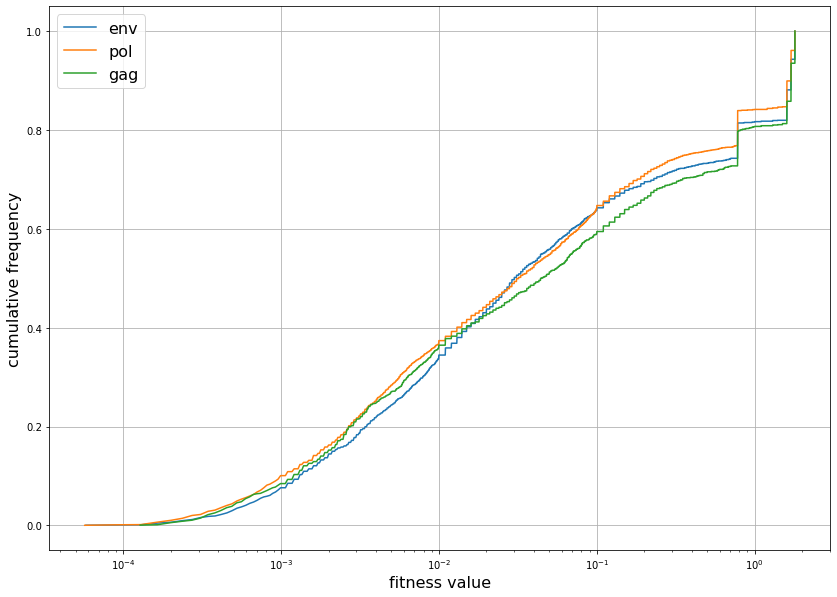

In [2]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
regions = ["env","pol","gag"]
fontsize = 16

plt.figure(figsize=(14,10))
for region in regions:
    fitness = np.array([])
    for patient_name in patient_names:
        patient = Patient.load(patient_name)
        aft = patient.get_allele_frequency_trajectories(region)
        fitness_cost = trajectory.get_fitness_cost(patient, region, aft)
        fitness = np.concatenate((fitness, fitness_cost))

    hist, bins = np.histogram(fitness[~np.isnan(fitness)], bins=50000)
    bins = 0.5* (bins[1:] + bins[:-1])
    hist = hist / np.sum(hist)
    cumulative = np.cumsum(hist)
    
    mask1 = np.logical_and(cumulative[:-1] < 0.33, cumulative[1:] >= 0.33)
    mask2 = np.logical_and(cumulative[:-1] < 0.50, cumulative[1:] >= 0.5)
    mask3 = np.logical_and(cumulative[:-1] < 0.66, cumulative[1:] >= 0.66)
    
    print(f"{region} 33% : {bins[np.where(mask1)]}")
    print(f"{region} 50% : {bins[np.where(mask2)]}")
    print(f"{region} 66% : {bins[np.where(mask3)]}")

    plt.plot(bins, cumulative, label=f"{region}")
plt.grid()
plt.xlabel("fitness value", fontsize=fontsize)
plt.ylabel("cumulative frequency", fontsize=fontsize)
plt.xscale("log")
plt.legend(fontsize=fontsize)
plt.show()

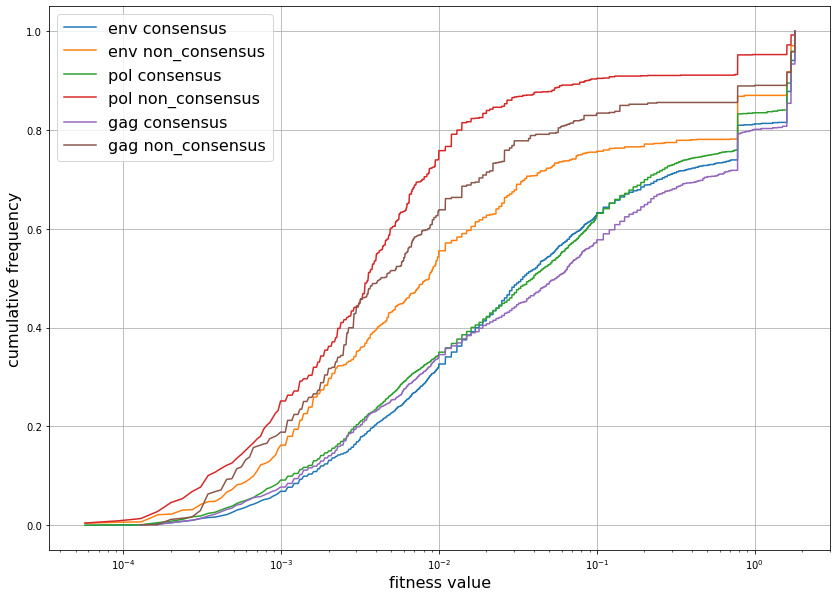

In [6]:
# Dividing between consensus and non consensus

patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
regions = ["env","pol","gag"]
fontsize = 16

plt.figure(figsize=(14,10))
for region in regions:
    fitness_consensus = np.array([])
    fitness_non_consensus = np.array([])
    for patient_name in patient_names:
        patient = Patient.load(patient_name)
        aft = patient.get_allele_frequency_trajectories(region)
        fit_cost = trajectory.get_fitness_cost(patient, region, aft)
        fit_consensus = fit_cost[get_consensus_mask(patient, region, aft)]
        fit_non_consensus = fit_cost[get_non_consensus_mask(patient, region, aft)]
        
        fitness_consensus = np.concatenate((fitness_consensus, fit_consensus))
        fitness_non_consensus = np.concatenate((fitness_non_consensus, fit_non_consensus))

    hist1, bins1 = np.histogram(fitness_consensus[~np.isnan(fitness_consensus)], bins=50000)
    bins1 = 0.5* (bins1[1:] + bins1[:-1])
    hist1 = hist1 / np.sum(hist1)
    cumulative1 = np.cumsum(hist1)
    
    hist2, bins2 = np.histogram(fitness_non_consensus[~np.isnan(fitness_non_consensus)], bins=50000)
    bins2 = 0.5* (bins2[1:] + bins2[:-1])
    hist2 = hist2 / np.sum(hist2)
    cumulative2 = np.cumsum(hist2)

    plt.plot(bins1, cumulative1, label=f"{region} consensus")
    plt.plot(bins2, cumulative2, label=f"{region} non_consensus")
plt.grid()
plt.xlabel("fitness value", fontsize=fontsize)
plt.ylabel("cumulative frequency", fontsize=fontsize)
plt.xscale("log")
plt.legend(fontsize=fontsize)
plt.show()